In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd

In [2]:
train = np.loadtxt('/Users/mamolchanova/Documents/Обучение/ML/21 занятие - извлечение признаков изображения/digit-recognizer/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('/Users/mamolchanova/Documents/Обучение/ML/21 занятие - извлечение признаков изображения/digit-recognizer/test.csv', delimiter=',', skiprows=1)

In [3]:
train.shape

(42000, 785)

In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))
#выделяю X
X = train[:, 1:]

In [5]:
#разделяю на данные на обучающую и валидационную выборки
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, X, test_size=0.2,
    random_state=42)

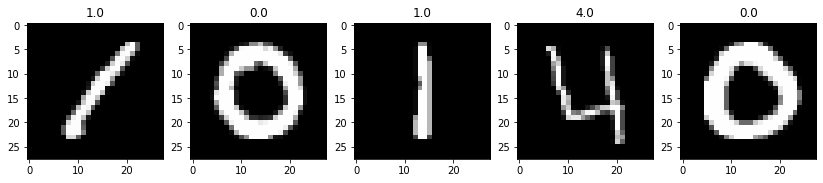

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [7]:
#подключаю SVD
from sklearn.decomposition import TruncatedSVD

In [8]:
svd = TruncatedSVD(n_components=150, n_iter=7, random_state=42)

In [9]:
svd.fit(x_train)

TruncatedSVD(algorithm='randomized', n_components=150, n_iter=7,
             random_state=42, tol=0.0)

In [10]:
print(svd.explained_variance_ratio_.sum())

0.9485825257570517


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier( n_neighbors = 3 )

In [13]:
X_train_svd = svd.transform(x_train)

In [14]:
model.fit(X_train_svd, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
X_test_svd=svd.transform(x_val)

In [16]:
model.score(X_test_svd, y_val)

0.9701190476190477

In [17]:
X_pred_svd = svd.transform(test)

In [18]:
y_pred=model.predict(X_pred_svd)

In [19]:
y_pred=y_pred.astype(np.uint8)

In [20]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred, 1):
        dst.write('%s,%s\n' % (i, p))